# Context

Cardiovascular diseases (CVDs) are the number 1 cause of death in the world, taking an estimated 18 million lives each year, which stands for 31% of all deaths around the globe.

Heart failure is a common event caused by CVDs and the provided dataset contains 11 features that can be used to predict mortality by heart failure.

It worth noting, that about a third of the deaths happen to people with the age under 70 which indicates that heart failure is not only a problem of the elderly.

With this notebook, I would like to explore the data and build a model to predict mortality by heart failure. Consequently, we can indentify people with high risk and provide them with necessary treatment.

You can find the following dataset on Kaggle: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## Attributes

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

### Require all the necessary tools and libraries

In [41]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [42]:
# load the data
df=pd.read_csv("./assets/dataset.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [43]:
# check the types of the data
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Based on the output of the previous step it's clear that we need to convert the data types to primitives, so I'll convert objects to strings

In [44]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [45]:
# check the data types again
df.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

In [48]:
# Encode the string columns
le=LabelEncoder()
df[string_col]=df[string_col].apply(le.fit_transform)

In [49]:
# check the data types again
df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

# Correlation Matrix

Correlation matrix is essential to understand the relationship between the features and the target variable. We will use the visualization to have a proper understanding.

### Legend
- Dark Colors: Negative Correlation
- Light Colors: Positive Correlation

In [50]:
px.imshow(df.corr(),title="Correlation Matrix of the Heat Failure Prediction")

In [54]:
# Show the distribution of Heart Disease by Age
px.histogram(df,x="Age",color="HeartDisease",title="Distribution of Heart Disease by Age")

In [55]:
# Show the distribution of Heart Disease by Sex
px.histogram(df,
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")

# Data Preprocessing

In [56]:
# Check the null values and clean the data

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [57]:
if df.isnull().sum().sum()>0:
    df=df.dropna()

In [58]:
# Check the null values again
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [59]:
# Check the outliers
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


# Training

## Split the dataset into train and test (80/20)

In [61]:
from sklearn.model_selection import train_test_split
# drop the target variable
X=df.drop("HeartDisease",axis=1)
y=df["HeartDisease"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


## K-Nearest Neighbors (KNN)

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_classificator = KNeighborsClassifier()
knn_parameters = {
    'n_neighbors': range(1, 15)
}

knn_grid_search = GridSearchCV(knn_classificator, knn_parameters, cv=5)
knn_grid_search.fit(X_train, y_train)

print("Best value for 'n_neighbors' hyperparameter is", knn_grid_search.best_params_['n_neighbors'])

Best value for 'n_neighbors' hyperparameter is 9


In [71]:
knn = knn_grid_search.best_estimator_
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
print("Test Accuracy: ",test_accuracy)

Test Accuracy:  0.6630434782608695


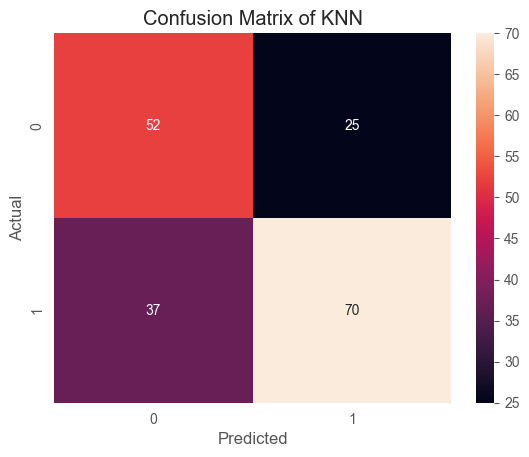

In [72]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix of KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [74]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.68      0.63        77
           1       0.74      0.65      0.69       107

    accuracy                           0.66       184
   macro avg       0.66      0.66      0.66       184
weighted avg       0.67      0.66      0.67       184



## Tree based algorithms

### Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
rfc_parameters = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20, 50, 100]
}
rfc_grid_search = GridSearchCV(rfc, rfc_parameters, cv=5)
rfc_grid_search.fit(X_train, y_train)

print("Best value for 'n_estimators' hyperparameter is", rfc_grid_search.best_params_['n_estimators'])
print("Best value for 'max_depth' hyperparameter is", rfc_grid_search.best_params_['max_depth'])


Best value for 'n_estimators' hyperparameter is 100
Best value for 'max_depth' hyperparameter is 20


In [76]:
rfc = rfc_grid_search.best_estimator_
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
print("Test Accuracy: ",test_accuracy)

Test Accuracy:  0.8804347826086957


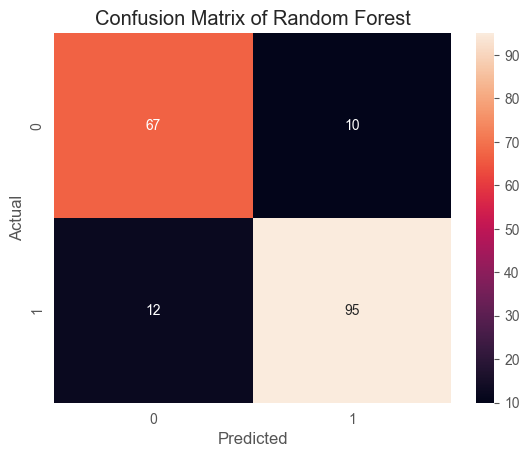

In [77]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix of Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [82]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



### Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()
dtc_parameters = {
    'max_depth': [None, 5, 10, 20, 50, 100]
}
dtc_grid_search = GridSearchCV(dtc, dtc_parameters, cv=5)
dtc_grid_search.fit(X_train, y_train)

print("Best value for 'max_depth' hyperparameter is", dtc_grid_search.best_params_['max_depth'])

Best value for 'max_depth' hyperparameter is 5


In [79]:
dtc = dtc_grid_search.best_estimator_
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
print("Test Accuracy: ",test_accuracy)

Test Accuracy:  0.8641304347826086


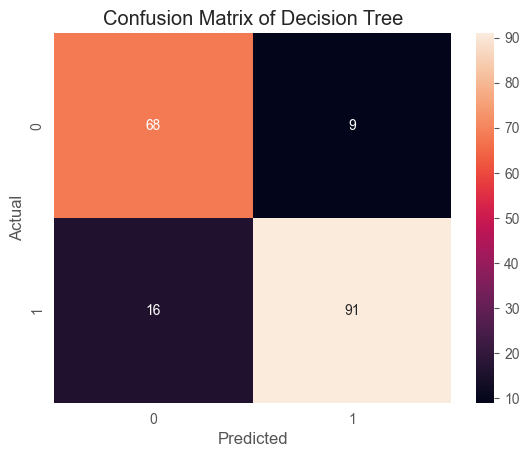

In [80]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix of Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [81]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

